<a href="https://colab.research.google.com/github/mtakemura/datasharing/blob/master/fastai2_Munich_ACL_morphology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import os

In [ ]:
!pip install fastai --upgrade

In [3]:
from fastai.vision.all import *

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Count the number of images in each category.

In [5]:
path = 'gdrive/My Drive/datasets/Munich_AML_Morphology_Dataset/AML-Cytomorphology_LMU'

total = 0
for sub_dir in os.listdir(path):
    target_dir = path + '/' + sub_dir
    files = os.listdir(target_dir)
    count = len(files)
    total = total + count
    print(f'{sub_dir}: {count}')
print(f'Total: {total}')

NGS: 8485
MYB: 42
NGB: 109
BAS: 79
KSC: 15
MMZ: 15
EBO: 78
PMO: 70
MYO: 3268
MON: 1789
EOS: 424
MOB: 26
PMB: 18
LYT: 3937
LYA: 11
Total: 18366


Note that there is an class imbalance.

In [6]:
cells = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(224),
    # batch_tfms=aug_transforms(size=224, min_scale=0.75)
)
dls = cells.dataloaders(path)

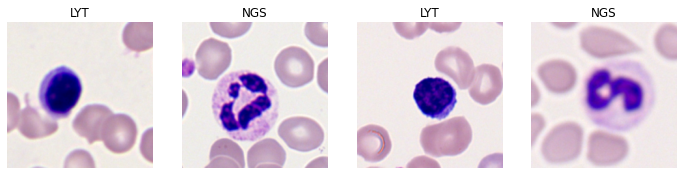

In [7]:
dls.valid.show_batch(max_n=4, nrows=1)

In [8]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [9]:
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.701281,0.408606,0.115165,51:54


epoch,train_loss,valid_loss,error_rate,time
0,0.303196,0.292368,0.078955,33:29
1,0.196250,0.226154,0.064797,33:06
2,0.063399,0.204916,0.047645,32:53
3,0.020951,0.201958,0.045195,33:17


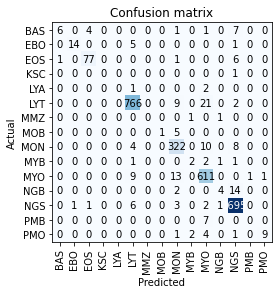

In [10]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

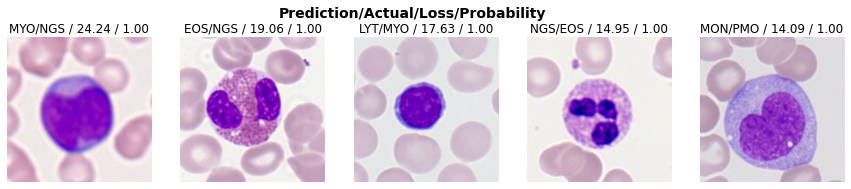

In [11]:
interp.plot_top_losses(5, nrows=1)